In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import to_categorical
from keras import models, layers
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [10]:
# Load IMDb dataset with the top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Concatenate train and test data
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

In [11]:
# Vectorize the sequences
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectorize the data
data = vectorize(data)
label = np.array(label).astype("float32")

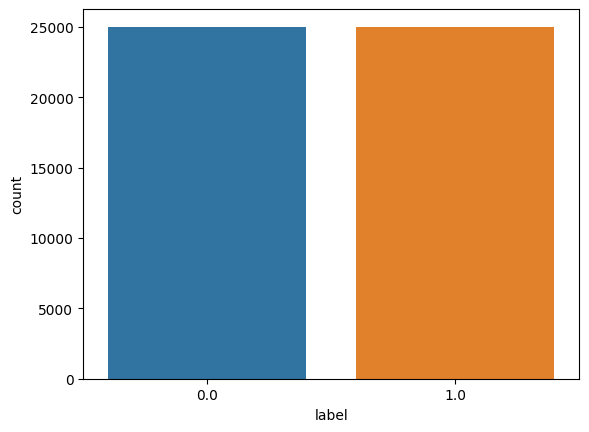

In [12]:
# Plot label distribution
labelDF = pd.DataFrame({'label': label})
sns.countplot(x='label', data=labelDF)
plt.show()

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.20, random_state=1)

# Build sequential model
model = models.Sequential()
model.add(layers.Dense(50, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                500050    
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 505201 (1.93 MB)
Trainable params: 50520

In [14]:
print("Mean Validation Accuracy:", np.mean(results.history["val_accuracy"]))

Mean Validation Accuracy: 0.895499974489212


In [15]:
# Define early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [16]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
results = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=500,
    validation_data=(X_test, y_test),
    callbacks=[callback]
)

Epoch 1/2
80/80 [==============================] - 5s 46ms/step - loss: 0.3938 - accuracy: 0.8264 - val_loss: 0.2569 - val_accuracy: 0.8949
Epoch 2/2
80/80 [==============================] - 2s 29ms/step - loss: 0.2144 - accuracy: 0.9185 - val_loss: 0.2579 - val_accuracy: 0.8951


In [17]:
# Mean validation accuracy
print("Mean Validation Accuracy:", np.mean(results.history["val_accuracy"]))

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Mean Validation Accuracy: 0.8950000107288361
20/20 [==============================] - 0s 12ms/step - loss: 0.2579 - accuracy: 0.8951
Test loss: 0.25792229175567627
Test accuracy: 0.8950999975204468


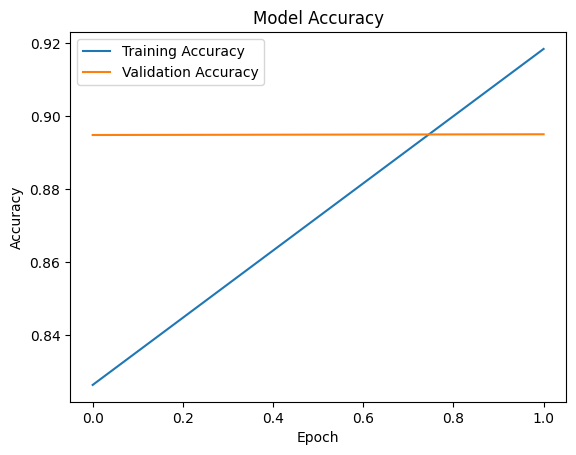

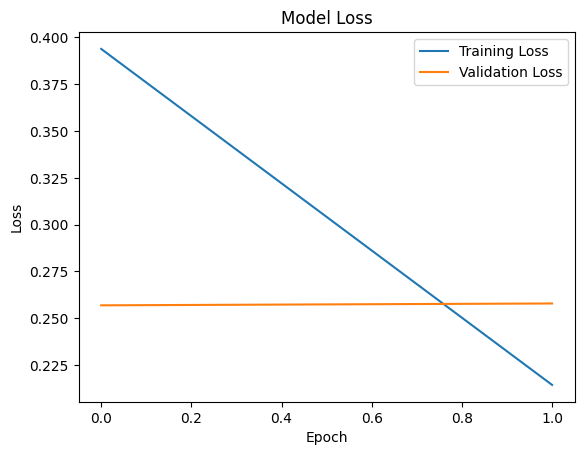

In [18]:
# Plot training history
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()